In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
# To ignore all the warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading data
column_names=['user_id', 'item_id', 'rating', 'timestamp'] # From README
df=pd.read_csv('ml-100k/u.data', sep='\t', names=column_names)

movie_titles=pd.read_csv('ml-100k/u.item', sep='\|', header=None)

In [4]:
df.head(n=10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [5]:
df.shape

(100000, 4)

In [6]:
# Unique users
print(df['user_id'].nunique())

943


In [7]:
# Unique movies
print(df['item_id'].nunique())

1682


In [8]:
movie_titles.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
movie_titles.shape

(1682, 24)

In [10]:
movie_titles=movie_titles[[0,1]]
movie_titles.columns=['item_id', 'title']

In [11]:
movie_titles.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [12]:
df=pd.merge(df, movie_titles, on='item_id')
df.tail(10)

,user_id,item_id,rating,timestamp,title
99990,416,1594,5,893212484,Everest (1998)
99991,648,1626,1,884795447,Nobody Loves Me (Keiner liebt mich) (1994)
99992,655,1645,4,892871225,"Butcher Boy, The (1998)"
99993,747,1659,1,888733313,Getting Away With Murder (1996)
99994,916,1682,3,880845755,Scream of Stone (Schrei aus Stein) (1991)
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


### Exploratory Data Analysis

In [13]:
df.groupby('title').mean()

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
...,...,...,...,...
Young Guns II (1990),504.068182,1188.0,2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",452.487805,547.0,3.341463,8.821438e+08
Zeus and Roxanne (1997),532.833333,1164.0,2.166667,8.775338e+08


In [14]:
# Average rating
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])
ratings.head(10)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [15]:
df.groupby('title').count()

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41
...,...,...,...,...
Young Guns II (1990),44,44,44,44
"Young Poisoner's Handbook, The (1995)",41,41,41,41
Zeus and Roxanne (1997),6,6,6,6


In [16]:
# Number of ratings per movie
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])
ratings.head(10)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [17]:
# Sort accorging to ratings of the movies
ratings.sort_values(by='rating', ascending=False).head(10)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
"Great Day in Harlem, A (1994)",5.0,1
Aiqing wansui (1994),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3


Note that the heightest rated(rated 5) movies have very less number of ratings so they are innacurate

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_style('white')

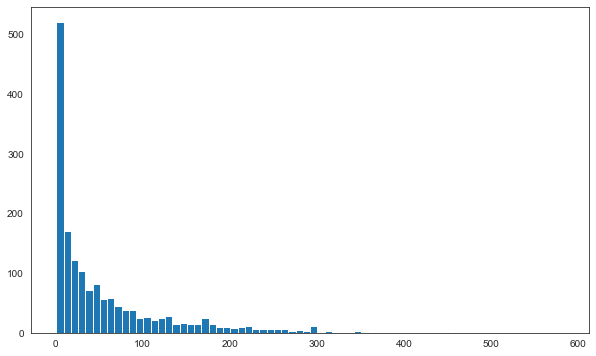

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(ratings['num of ratings'], bins=70)
plt.show()

Most of the films have the number of ratings less than 100, majority being in range 0-10. We can drop these movies so that we are left wth a lot less data and also our system is much more accurate.

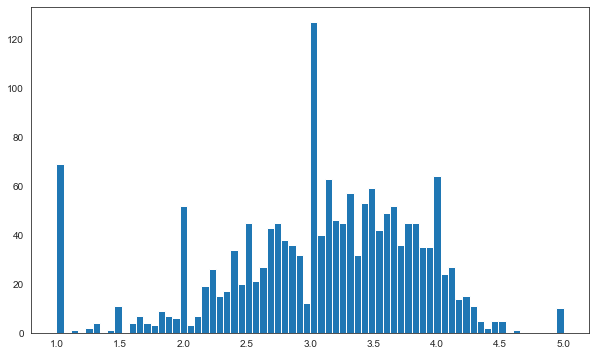

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(ratings['rating'], bins=70)
plt.show()

If we ignore the extremeties(since mostly they consists of data with very less number of ratings and therefore inaccurate), the histogram shows a normal distribution, with the most number of average ratings as about 3.

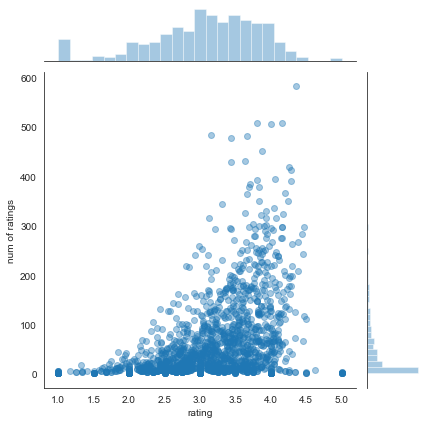

In [21]:
sb.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.4)

According to the jointplot, for most of the datapoints as the average rating increases the number of users rating that movie also increases.

### Recommendation System

In [22]:
df.head(10)

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [23]:
movie_mat=df.pivot_table(index='user_id', values='rating', columns='title')
movie_mat.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ratings.sort_values('num of ratings', ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Since Star Wars (1977) has the maximum number of ratings we can use it as an example to find movies similar to it

In [25]:
starwars_ratings=movie_mat['Star Wars (1977)']
starwars_ratings.head(10)

user_id
1     5.0
2     5.0
3     NaN
4     5.0
5     4.0
6     4.0
7     5.0
8     5.0
9     5.0
10    5.0
Name: Star Wars (1977), dtype: float64

In [26]:
# Correlation
similar2starwars=movie_mat.corrwith(starwars_ratings)
similar2starwars.head(10)

title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64

In [27]:
# Removing NaN values
corr_starwars=pd.DataFrame(similar2starwars, columns=['correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head(10)

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [28]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [29]:
# Movies highly correlated to Starwars
corr_starwars.sort_values(by='correlation', ascending=False).head(10)

,correlation,num of ratings
title,,
Man of the Year (1995),1.0,9
Hollow Reed (1996),1.0,6
Stripes (1981),1.0,5
"Beans of Egypt, Maine, The (1994)",1.0,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5
"Outlaw, The (1943)",1.0,2
"Line King: Al Hirschfeld, The (1996)",1.0,2
Hurricane Streets (1998),1.0,9
"Good Man in Africa, A (1994)",1.0,2


In [30]:
# Removing movies with number of ratings less than 100
corr_starwars=corr_starwars[corr_starwars['num of ratings']>100]
corr_starwars.head(10)

,correlation,num of ratings
title,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2001: A Space Odyssey (1968),0.230884,259
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151
Ace Ventura: Pet Detective (1994),0.062689,103
"Adventures of Priscilla, Queen of the Desert, The (1994)",0.054740,111
"African Queen, The (1951)",0.230540,152
Air Force One (1997),0.113164,431


In [31]:
# Movies similar to starwars
corr_starwars.sort_values('correlation', ascending=False).head(10)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [49]:
# Function to find movies similar to a given movie
def predict_movies(movie_name):
    movie_ratings=movie_mat[movie_name]
    similar2movie=movie_mat.corrwith(movie_ratings)
    corr_movie=pd.DataFrame(similar2movie, columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['num of ratings'])
    corr_movie=corr_movie[corr_movie['num of ratings']>100]
    predictions=corr_movie.sort_values('correlation', ascending=False)
    return list(predictions.index[1:10])

In [50]:
movie_name='L.A. Confidential (1997)'
predictions=predict_movies(movie_name)
print(predictions)

['Pinocchio (1940)', 'Miracle on 34th Street (1994)', 'Dumbo (1941)', 'Nightmare Before Christmas, The (1993)', 'Close Shave, A (1995)', 'Executive Decision (1996)', "Jackie Chan's First Strike (1996)", 'Taxi Driver (1976)', 'True Romance (1993)']


In [51]:
all_movies=list(movie_titles['title'].sort_values())
all_movies

["'Til There Was You (1997)",
 '1-900 (1994)',
 '101 Dalmatians (1996)',
 '12 Angry Men (1957)',
 '187 (1997)',
 '2 Days in the Valley (1996)',
 '20,000 Leagues Under the Sea (1954)',
 '2001: A Space Odyssey (1968)',
 '3 Ninjas: High Noon At Mega Mountain (1998)',
 '39 Steps, The (1935)',
 '8 1/2 (1963)',
 '8 Heads in a Duffel Bag (1997)',
 '8 Seconds (1994)',
 'A Chef in Love (1996)',
 'Above the Rim (1994)',
 'Absolute Power (1997)',
 'Abyss, The (1989)',
 'Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Across the Sea of Time (1995)',
 'Addams Family Values (1993)',
 'Addicted to Love (1997)',
 'Addiction, The (1995)',
 'Adventures of Pinocchio, The (1996)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'Adventures of Robin Hood, The (1938)',
 'Affair to Remember, An (1957)',
 'African Queen, The (1951)',
 'Afterglow (1997)',
 'Age of Innocence, The (1993)',
 'Aiqing wansui (1994)',
 'Air Bud (1997)',
 'Air Force One (1997)',
 'Air Up 